In [2]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import glob
import re
from mpl_toolkits import mplot3d

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
myAmino = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
FullAmino = ['ALA', 'CYS', 'ASP', 'GLU', 'PHE', 'GLY', 'HIS', 'ILE', 'LYS', 'LEU', 'MET', 'ASN', 'PRO', 'GLN', 'ARG', 'SER', 'THR', 'VAL', 'TRP', 'TYR']
aminos = {FullAmino[i]:myAmino[i] for i in range(len(myAmino))}

# zero is used as padding
AA_to_int = {
    'A': 1,
    'ALA': 1,
    'C': 2,
    'CYS': 2,
    'D': 3,
    'ASP': 3,
    'E': 4,
    'GLU': 4,
    'F': 5,
    'PHE': 5,
    'G': 6,
    'GLY': 6,
    'H': 7,
    'HIS': 7,
    'I': 8,
    'ILE': 8,
    'K': 9,
    'LYS': 9,
    'L': 10,
    'LEU': 10,
    'M': 11,
    'MET': 11,
    'N': 12,
    'ASN': 12,
    'P': 13,
    'PRO': 13,
    'Q': 14,
    'GLN': 14,
    'R': 15,
    'ARG': 15,
    'S': 16,
    'SER': 16,
    'T': 17,
    'THR': 17,
    'V': 18,
    'VAL': 18,
    'W': 19,
    'TRP': 19,
    'Y': 20,
    'TYR': 20,
    'X': 21
}
## amino acid to integer
atoi = {key: val - 1 for key, val in AA_to_int.items()}
## integer to amino acid
iota = {y: x for x, y in atoi.items() if len(x) == 1}

In [4]:
def load_dTERMen_sc(etab):
    #Initialise and read energy table        
    allpos = []
    lines = [line.replace("B,","").rstrip('\n') for line in open(etab)]
    holo = dict()
    AllSelf = []
    for l in lines:
        #print(l)
        sp = re.split("\s+",l)
        allpos.append(int(sp[0]))
        if len(sp) == 3:
            AllSelf.append(float(sp[2]))
            k1 = sp[0]+myAmino[FullAmino.index(sp[1])]
            if k1 not in holo:
                holo[k1] = dict()
            holo[k1][k1] = float(sp[2])
            continue
        if len(sp) == 5:
            k1 = sp[0]+myAmino[FullAmino.index(sp[2])]
            k2 = sp[1]+myAmino[FullAmino.index(sp[3])]
            holo[k1][k2] = float(sp[4])
            AllSelf.append(float(sp[4]))
            continue
        print(l)
        break
        
    #Keep only unique position
    allpos = sorted(list(set(allpos)))
    return(holo,allpos)

def old_self_energies(query):
    self_e = []

    alletab = glob.glob(query)
    for etab in sorted(alletab):
        #Get Model name
        model = re.search("([A-Za-z0-9_]+)\.etab",etab).group(1)

        #Load scoring matrix
        (holo,allpos) = load_dTERMen_sc(etab)
        
        # if len(allpos) != 20:
            # print(model,len(allpos))
            # continue
        
        for pos in allpos:
            for elem in myAmino:
                k = str(pos)+elem
                self_e.append(holo[k][k])
    
    return self_e

In [5]:
def self_energies(query):
    self_e = []

    alletab = glob.glob(query)
    for etab in sorted(alletab):
        model = etab[:etab.index("condensed")]
        table = np.load(etab)
        for i in range(len(table)):
            # for j in range(len(table[0][0])):
            for j in range(20):
                self_e.append(table[i][i][j][j])
    
    return self_e

In [10]:
# for Bcl-xL, trying to compare self energies between TERMless TERMinator (COORDinator), dTERMen rerun on the whole complex, and the original dTERMen etabs from Frappier et al.
# condensed etabs are the result of condensing an etab of an entire complex down to only the size of the peptide, by taking the sum of all pair energies between the peptide and the protein and adding them to the peptide's residues' self energies

self_1 = self_energies("../../frappier_termless_np/tic0/B2CL1*condensed.etab.npy")
self_2 = self_energies("../../frappier_full_dtermen_np/B2CL1*_35condensed.etab.npy")
self_22 = old_self_energies("../etab_bench/B2CL1*_35.etab")

C:\Python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Bcl-xL Peptide Self Energies')

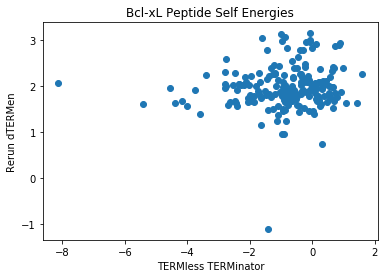

In [13]:
plt.scatter(np.log(self_1),np.log(self_2))
plt.xlabel("TERMless TERMinator")
plt.ylabel("Rerun dTERMen")
plt.title("Bcl-xL Peptide Self Energies")

C:\Python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Bcl-xL Peptide Self Energies')

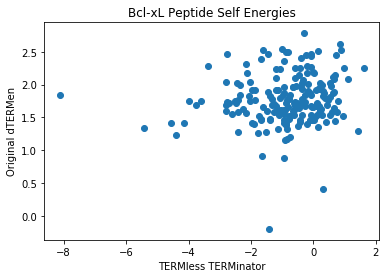

In [14]:
plt.scatter(np.log(self_1),np.log(self_22))
plt.xlabel("TERMless TERMinator")
plt.ylabel("Original dTERMen")
plt.title("Bcl-xL Peptide Self Energies")

In [58]:
self_3 = self_energies("../../frappier_termless_np/tic0/B2LA1*condensed.etab.npy")
self_4 = self_energies("../../frappier_full_dtermen_np/B2LA1*_35condensed.etab.npy")
self_44 = old_self_energies("../etab_bench/B2LA1*_35.etab")

Text(0.5, 1.0, 'Bfl-1 Peptide Self Energies')

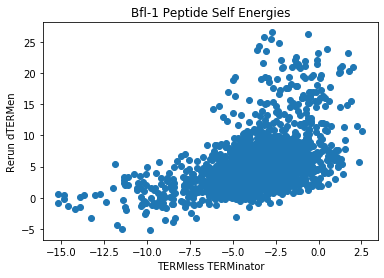

In [59]:
plt.scatter(self_3,self_4)
plt.xlabel("TERMless TERMinator")
plt.ylabel("Rerun dTERMen")
plt.title("Bfl-1 Peptide Self Energies")

Text(0.5, 1.0, 'Bfl-1 Peptide Self Energies')

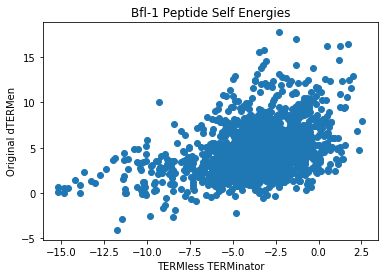

In [60]:
plt.scatter(self_3,self_44)
plt.xlabel("TERMless TERMinator")
plt.ylabel("Original dTERMen")
plt.title("Bfl-1 Peptide Self Energies")

In [6]:
self_5 = self_energies("../../frappier_termless_np/tic0/MCL1*condensed.etab.npy")
self_6 = self_energies("../../frappier_full_dtermen_np/MCL1*_35condensed.etab.npy")
self_66 = old_self_energies("../etab_bench/MCL1*_35.etab")

Text(0.5, 1.0, 'Mcl-1 Peptide Self Energies')

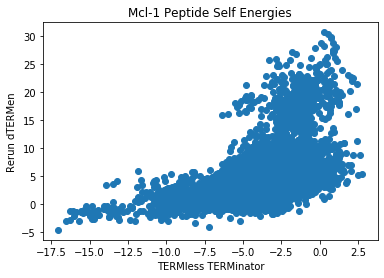

In [67]:
plt.scatter(self_5,self_6)
plt.xlabel("TERMless TERMinator")
plt.ylabel("Rerun dTERMen")
plt.title("Mcl-1 Peptide Self Energies")

Text(0.5, 1.0, 'Mcl-1 Peptide Self Energies')

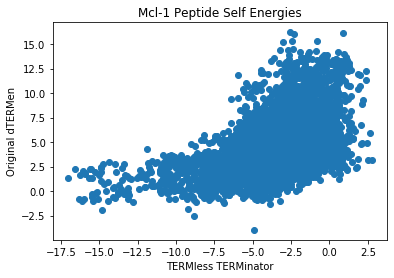

In [66]:
plt.scatter(self_5,self_66)
plt.xlabel("TERMless TERMinator")
plt.ylabel("Original dTERMen")
plt.title("Mcl-1 Peptide Self Energies")

In [7]:
self_666 = old_self_energies("../../frappier_chain_dtermen/MCL1*_35.etab") # sanity check between dTERMen run on only the chain and on the entire complex

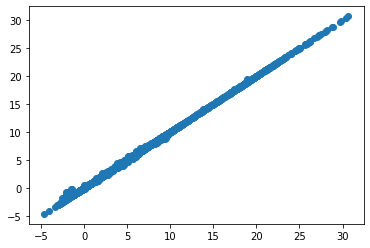

In [8]:
plt.scatter(self_6, self_666)

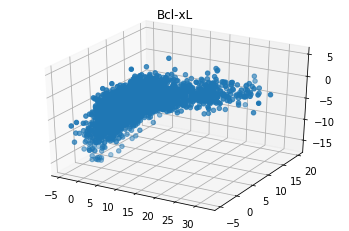

In [82]:
# attempting to plot in 3D

fig = plt.figure()
 
ax = plt.axes(projection ='3d') 

# plotting
ax.scatter(self_2, self_22, self_1)
ax.set_title("Bcl-xL")
plt.show()

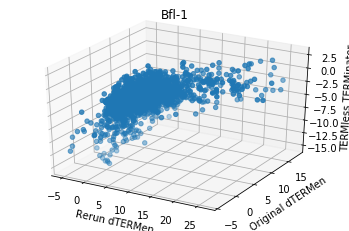

In [87]:
fig = plt.figure()
 
ax = plt.axes(projection ='3d') 

# plotting
ax.scatter(self_4, self_44, self_3)
ax.set_title("Bfl-1")
ax.set_xlabel("Rerun dTERMen")
ax.set_ylabel("Original dTERMen")
ax.set_zlabel("TERMless TERMinator")
plt.show()

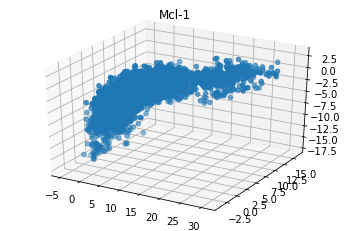

In [84]:
fig = plt.figure()
 
ax = plt.axes(projection ='3d') 

# plotting
ax.scatter(self_6, self_66, self_5)
ax.set_title("Mcl-1")
plt.show()